In [1]:
import Pkg; Pkg.activate(".")

 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`


In [2]:
using Distributed
using DataFrames
using CSV
using RCall

In [3]:
addprocs(20)

20-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21

In [4]:
nprocs()

21

In [5]:
procs()

21-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21

In [6]:
workers()

20-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
 15
 16
 17
 18
 19
 20
 21

In [7]:
nworkers()

20

In [8]:
myid()

1

In [9]:
remotecall_fetch(() -> myid(), 3)

3

`pmap` is preferred when each operation is long

In [10]:
pmap(i -> println("I'm worker $(myid()), working on $i"), 1:20)

      From worker 3:	I'm worker 3, working on 10
      From worker 8:	I'm worker 8, working on 7
      From worker 9:	I'm worker 9, working on 14
      From worker 16:	I'm worker 16, working on 2
      From worker 5:	I'm worker 5, working on 12
      From worker 12:	I'm worker 12, working on 4
      From worker 2:	I'm worker 2, working on 1
      From worker 10:	I'm worker 10, working on 13
      From worker 15:	I'm worker 15, working on 3
      From worker 11:	I'm worker 11, working on 19
      From worker 18:	I'm worker 18, working on 9
      From worker 17:	I'm worker 17, working on 5
      From worker 4:	I'm worker 4, working on 6
      From worker 13:	I'm worker 13, working on 18
      From worker 20:	I'm worker 20, working on 8
      From worker 21:	I'm worker 21, working on 16
      From worker 7:	I'm worker 7, working on 17
      From worker 14:	I'm worker 14, working on 20
      From worker 6:	I'm worker 6, working on 11
      From worker 19:	I'm worker 19, working on 15


20-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

`@distributed for` is better when each operation is short

In [11]:
@sync @distributed for i in 1:20
    println("I'm worker $(myid()), working on $i")
end

      From worker 15:	I'm worker 15, working on 14
      From worker 11:	I'm worker 11, working on 10
      From worker 12:	I'm worker 12, working on 11
      From worker 4:	I'm worker 4, working on 3
      From worker 2:	I'm worker 2, working on 1
      From worker 10:	I'm worker 10, working on 9
      From worker 6:	I'm worker 6, working on 5
      From worker 3:	I'm worker 3, working on 2
      From worker 5:	I'm worker 5, working on 4
      From worker 19:	I'm worker 19, working on 18
      From worker 20:	I'm worker 20, working on 19
      From worker 9:	I'm worker 9, working on 8
      From worker 13:	I'm worker 13, working on 12
      From worker 14:	I'm worker 14, working on 13
      From worker 7:	I'm worker 7, working on 6
      From worker 16:	I'm worker 16, working on 15
      From worker 17:	I'm worker 17, working on 16
      From worker 8:	I'm worker 8, working on 7
      From worker 21:	I'm worker 21, working on 20
      From worker 18:	I'm worker 18, working on 17


Task (done) @0x00007fae2c952bf0

In [12]:
printsquare(i) = println("working on i=$i: its square is $(i^2)");
printsquare(2) 

working on i=2: its square is 4


In [13]:
@sync @distributed for i in 1:10
  printsquare(i) # error
end

LoadError: TaskFailedException:
On worker 2:
UndefVarError: #printsquare not defined
deserialize_datatype at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:1252
handle_deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:826
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773
handle_deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:833
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773 [inlined]
deserialize_global_from_main at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Distributed/src/clusterserialize.jl:180
#3 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Distributed/src/clusterserialize.jl:72 [inlined]
foreach at ./abstractarray.jl:2009
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Distributed/src/clusterserialize.jl:72
handle_deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:919
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773
handle_deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:830
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773
deserialize_datatype at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:1276
handle_deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:826
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773
handle_deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:833
deserialize at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Serialization/src/Serialization.jl:773 [inlined]
deserialize_msg at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Distributed/src/messages.jl:99
#invokelatest#1 at ./essentials.jl:710 [inlined]
invokelatest at ./essentials.jl:709 [inlined]
message_handler_loop at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Distributed/src/process_messages.jl:185
process_tcp_streams at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Distributed/src/process_messages.jl:142
#99 at ./task.jl:356

...and 9 more exception(s).

Stacktrace:
 [1] sync_end(::Channel{Any}) at ./task.jl:314
 [2] (::Distributed.var"#159#161"{var"#13#14",UnitRange{Int64}})() at ./task.jl:333

In [14]:
@everywhere printsquare(i) = println("working on i=$i:\tits square is $(i^2)")

In [15]:
@sync @distributed for i in 1:20
  printsquare(i)
end

      From worker 5:	working on i=14:	its square is 196
      From worker 20:	working on i=9:	its square is 81
      From worker 21:	working on i=10:	its square is 100
      From worker 13:	working on i=2:	its square is 4
      From worker 10:	working on i=19:	its square is 361
      From worker 17:	working on i=6:	its square is 36
      From worker 4:	working on i=13:	its square is 169
      From worker 19:	working on i=8:	its square is 64
      From worker 12:	working on i=1:	its square is 1
      From worker 15:	working on i=4:	its square is 16
      From worker 18:	working on i=7:	its square is 49
      From worker 9:	working on i=18:	its square is 324
      From worker 11:	working on i=20:	its square is 400
      From worker 2:	working on i=11:	its square is 121
      From worker 14:	working on i=3:	its square is 9
      From worker 7:	working on i=16:	its square is 256
      From worker 6:	working on i=15:	its square is 225
      From worker 16:	working on i=5:	its square is 25
 

Task (done) @0x00007faedf9ba4a0

In [18]:
@everywhere begin
  using Pkg
  Pkg.activate(".")
  using Distributions
  using SharedArrays
end

      From worker 7:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`


 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`


      From worker 8:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 21:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 15:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 2:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 14:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 16:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 3:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 20:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.toml`
      From worker 5:	 Activating environment at `~/Projects/scratch-code/julia_stuff/distributed/Project.to

In [19]:
@everywhere function onesim(N, nrarecat, μ)
    p = μ / N
    @assert 0.0 ≤ p ≤ 0.5 "the rate category probability must ∈[0, 0.5]"
    if nrarecat == 1
        probs = [p, (1.0 - p) / 2.0, (1.0 - p) / 2.0]
        @assert p ≤ 1.0
    else
        probs = [p, p, 1 - 2p]
    end
    
    df = 2
    obs = rand(Multinomial(N, probs), 1)
    p̂ = obs ./ N
    pearson = N * sum((p̂ - probs).^2 ./ probs)
    Qlog = 0.0
    for i in 1:3
        if obs[i] == 0
            continue
        end
        
        ratio = p̂[i] / probs[i]
        ratio ≉ 1.0 || continue
        
        dev = ratio - 1.0
        Qlog += probs[i] * dev^2 / log(ratio)
    end
    
    Qlog *= 2N
    
    p_pearson = ccdf(Chisq(df), pearson)
    p_Qlog    = ccdf(Chisq(df), Qlog)
    
    return pearson, Qlog, p_pearson, p_Qlog
end

In [20]:
nreps = 200
samplesizes = [30, 100, 1000]
nrarecats = [1, 2]
μs = [0.1, 1.0, 2.0]

Nssize    = length(samplesizes)
Nnrarecat = length(nrarecats)
Nμ        = length(μs)

ntotal = nreps * Nssize * Nnrarecat * Nμ

3600

In [21]:
samplesize = SharedArray(
    repeat(samplesizes, inner=nreps, outer=Nnrarecat * Nμ))
nrarecat = SharedArray(
    repeat(nrarecats, inner=nreps * Nssize, outer=Nμ))
μ = SharedArray(
    repeat(μs, inner=nreps * Nssize * Nnrarecat));

In [22]:
pearson   = SharedArray{Float64}(ntotal)
qlog      = SharedArray{Float64}(ntotal)
p_pearson = SharedArray{Float64}(ntotal)
p_qlog    = SharedArray{Float64}(ntotal);

In [23]:
@sync @distributed for i in 1:ntotal
  res = onesim(samplesize[i], nrarecat[i], μ[i])
  pearson[i], qlog[i], p_pearson[i], p_qlog[i] = res
end

Task (done) @0x00007faedd6cd390

In [24]:
df = DataFrame(
  samplesize = samplesize,
  numrarecategories = nrarecat,
  numrareexpected = μ,
  pearson = pearson,
  qlog = qlog,
  pval_pearson = p_pearson,
  pval_qlog = p_qlog
)

,samplesize,numrarecategories,numrareexpected,pearson,qlog,pval_pearson
,Int64,Int64,Float64,Float64,Float64,Float64
1,30,1,0.1,0.635452,0.735356,0.727802
2,30,1,0.1,4.91639,5.07743,0.0855894
3,30,1,0.1,0.100334,0.200334,0.95107
4,30,1,0.1,0.234114,0.33394,0.889535
5,30,1,0.1,8.16054,5.29677,0.0169029
6,30,1,0.1,0.234114,0.33394,0.889535
7,30,1,0.1,1.30435,1.40641,0.520912
8,30,1,0.1,0.234114,0.33394,0.889535
9,30,1,0.1,1.30435,1.40641,0.520912


In [25]:
hcat(pearson, qlog)

3600×2 Array{Float64,2}:
 0.635452  0.735356
 4.91639   5.07743
 0.100334  0.200334
 0.234114  0.33394
 8.16054   5.29677
 0.234114  0.33394
 1.30435   1.40641
 0.234114  0.33394
 1.30435   1.40641
 1.30435   1.40641
 0.635452  0.735356
 0.234114  0.33394
 2.2408    2.35029
 ⋮         
 1.0       1.02361
 5.00402   4.38353
 2.50904   4.56634
 1.00402   1.11862
 2.00402   4.00401
 2.50904   4.56634
 2.00402   4.00401
 0.501004  0.558309
 2.501     4.46731
 1.00402   1.11862
 2.00402   4.00401
 0.501004  0.467308

In [26]:
quantile(p_pearson, 0.05)

0.016519621664343873

In [27]:
quantile(p_qlog, 0.05)

0.05099543860300213

In [28]:
@rlibrary ggplot2

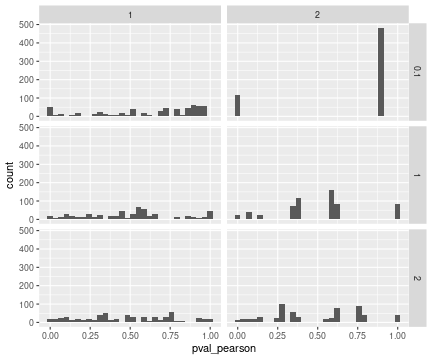

RObject{VecSxp}


In [29]:
ggplot(df, aes(x=:pval_pearson)) +
    geom_histogram(bins = 30) +
    facet_grid(R"numrareexpected~numrarecategories")

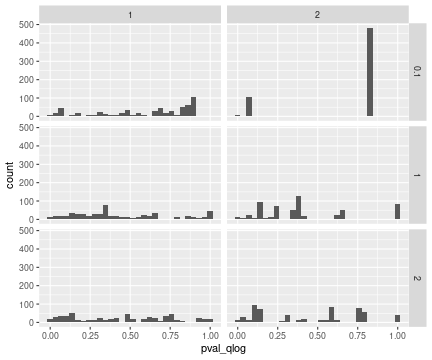

RObject{VecSxp}


In [30]:
ggplot(df, aes(x=:pval_qlog)) +
    geom_histogram(bins = 30) +
    facet_grid(R"numrareexpected~numrarecategories")

In [31]:
by(df, [:numrarecategories, :numrareexpected], d -> quantile(d.pval_pearson, 0.05))

,numrarecategories,numrareexpected,x1
,Int64,Float64,Float64
1,1,0.1,0.0153111
2,2,0.1,0.0163957
3,1,1.0,0.0513511
4,2,1.0,0.078401
5,1,2.0,0.0319406
6,2,2.0,0.0603441


In [32]:
by(df, [:numrarecategories, :numrareexpected], d -> quantile(d.pval_qlog, 0.05))

,numrarecategories,numrareexpected,x1
,Int64,Float64,Float64
1,1,0.1,0.058493
2,2,0.1,0.0653125
3,1,1.0,0.0482469
4,2,1.0,0.0700236
5,1,2.0,0.0334906
6,2,2.0,0.0200083
